# Treemap y Gráfico de Barras Interactivo

## 0. Importamos librerías

In [ ]:
import pandas as pd
import plotly.express as px
from datetime import datetime

## 1. Presentamos los datos

En este ejercicio de visualización se va a trabajar con datos públicos proporcionados por la plataforma "Kaggle" (https://www.kaggle.com/datasets/whisperingkahuna/footballers-with-50-international-goals-men). Es un dataset actual, ya que la última vez que fue actualizado fue el 17 de noviembre de 2024. 

Presenta unos datos de futbolistas masculinos que han conseguido anotar 50 goles o más en partidos internacionales.

In [153]:
# Se carga el CSV
ruta_csv = r"C:\Users\Isabel\Desktop\YO\Master\VisualizacionAvanzada\Tarea_Final\dataset.csv"

In [157]:
# Cargar el archivo
df = pd.read_csv(ruta_csv)
print(df.shape)
df.head(10)

(82, 9)


,Rank,Player,Nation,Confederation,Goals,Caps,Goals per match,Career span,Date of 50th goal
0,1,Cristiano Ronaldo,Portugal,UEFA,135,217,0.62,2003-,26-Jun-14
1,2,Lionel Messi,Argentina,CONMEBOL,112,190,0.59,2005-,29-Mar-16
2,3,Ali Daei,Iran,AFC,108,148,0.73,1993-2006,9-Jan-00
3,4,Sunil Chhetri,India,AFC,94,151,0.62,2005-2024,31-Dec-15
4,5,Mokhtar Dahari,Malaysia,AFC,89,142,0.63,1972-1985,22-Aug-76
5,6,Ali Mabkhout,United Arab Emirates,AFC,85,115,0.74,2009-,31-Aug-19
6,6,Romelu Lukaku,Belgium,UEFA,85,120,0.71,2010-,10-Oct-19
7,8,Ferenc Puskás,Hungary_Spain,UEFA,84,89,0.94,1945-1962,24-Jul-52
8,8,Robert Lewandowski,Poland,UEFA,84,156,0.54,2008-,5-Oct-17
9,10,Godfrey Chitalu,Zambia,CAF,79,111,0.71,1968-1980,7-Nov-78


Este conjunto de datos tiene 82 filas y 9 columnas.
Se van a realizar dos gráficos distintos, un "Treemap" para ver los goles por Confederación, País y Jugador, y, otro gráfico de barras interactivo para representar el Top 10 de jugadores que menos tiempo han tardado en conseguir su gol número 50. 
Para estas visualizaciones se usarán las columnas correspondientes.

## 2. Treemap

Un treemap es una visualización que se basa en las jerarquías y mediante el cuál se pueden representar grandes cantidades de datos en un espacio compacto. Muestra la superficia relativa que están ocupando un conjunto de datos, basados en una variable. A partir de esta, se pueden mostrar sus subconjuntos con una segunda variable, tercera, etc., hasta el nivel que el usuario desee.

A continuación:
1. Limpiamos y preprocesamos los datos eliminando los espacios en blanco.
2. Convertimos las columnas que contienen fechas a un formato datetime.
3. Calculamos los goles por Confederación.
4. Agregamos jugadores (como nivel adicional) al gráfico.
5. Configuramos y mostramos el Treemap.

In [159]:
# Eliminamos espacios en blanco en las columnas de texto
for x in ["Player", "Nation", "Confederation"]:
    df[x] = df[x].str.strip()

In [161]:
# Convertimos las columnas de fechas a formato datetime
df["Date of 50th goal"] = pd.to_datetime(df["Date of 50th goal"], format="%d-%b-%y", errors="coerce")

In [163]:
# Calcular goles por confederación
goles_por_confederacion = df.groupby("Confederation")["Goals"].sum().reset_index()

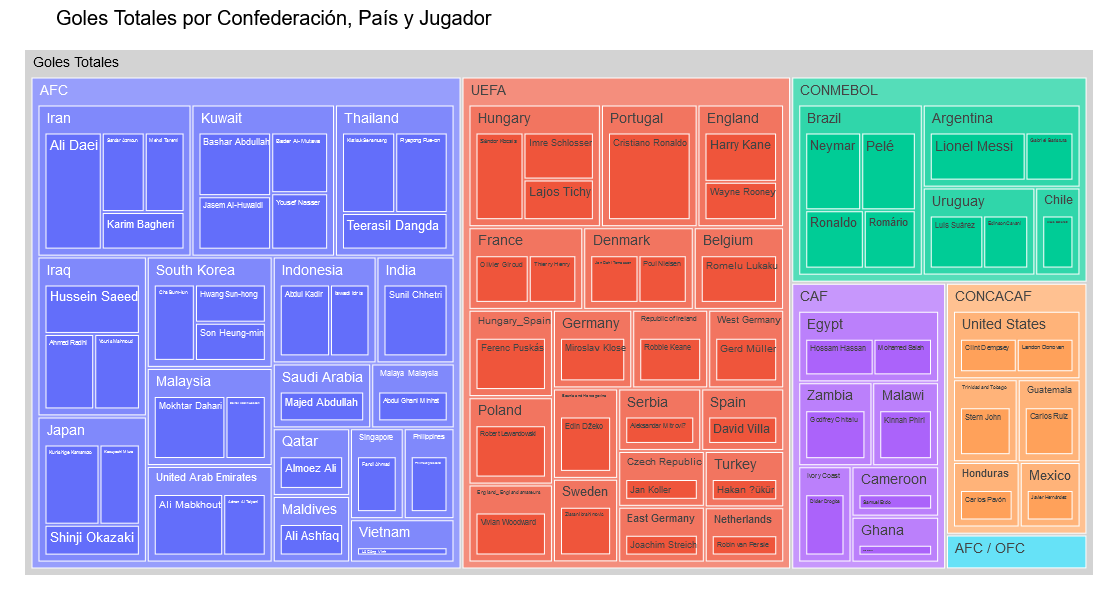

In [165]:
# Agregar jugadores (nivel adicional) al treemap y mostrarlo
fig1 = px.treemap(
    df,
    path=[px.Constant("Goles Totales"),"Confederation", "Nation", "Player"],  # Jerarquía: Confederación > País > Jugador
    values="Goals",
    title="Goles Totales por Confederación, País y Jugador",
    labels={"Goals": "Goles", "Confederation": "Confederación", "Nation": "País", "Player": "Jugador"}
)

# Ajustar diseño
fig1.update_traces(root_color="lightgrey")  # Color del nodo raíz
fig1.update_layout(
    font = dict(
      family="Arial",
        size=14,
        color="black"
    ),
    margin=dict(t=50, l=25, r=25, b=25),
    height=600,
    width=800
)

# Mostrar gráfico
fig1.show()

Como resultado de la visualización proporcionada, se puede ver que la Confederación con más goles es la "AFC" (2153 goles) y que la región que más goles tiene es Irán con 264 goles. A esta le preceden "UEFA" (1646 goles), "CONMEBOL" (619 goles), "CAF" (450 goles), "CONCACAF" (361 goles) y, por último, "AFC/OFC" con tan solo 50 goles.

Se puede ver que la Confederación Asiática de Fútbol (AFC) es la que más goles tiene. Sin embargo, es la que está formada por más países. Por lo que se puede deducir que sus países por separado no son tan goleadores. No obstante, si analizamos la "CONMEBOL", se puede ver que tan solo la forman 4 países y aún así es la tercera que más goles proporciona. Esto quiere decir que sus jugadores marcan más goles que los de la "AFC".

Finalmente, visualizamos que el hecho de que una Confederación tenga más o menos goles no solo depende de los goles que marque cada jugador, sino que también, de la cantidad de países que la forman.

## 3. Gráfico de Barras Interactivo

Los gráficos de barras representan gráficamente datos mediante barras verticales, o en este caso, horizontales. Estos gráficos son de los más usados debido a la capacidad que tiene de interpretar información de manera comprensible y sencilla, haciendo más fácil la tarea de analizar o de tomar decisiones basadas en datos.

Estos gráficos son muy versátiles y se utilizan para comparar cantidades o frecuencias entre diferentes grupos o categorías, para saber cuándo hay fuertes cambios o para presentar datos de una forma muy visual para el usuario.

Este gráfico será interactivo, es decir, incorporará elementos dinámicos que el usuario podrá ver pasando el cursor por encima. Estos datos mostrarán información sobre los jugadores, como su nombre, los goles totales o los años que ha tardado en conseguir su gol número 50.

A continuación:
1. Calculamos los años hasta el gol número 50.
2. Filtramos los datos para eliminar aquellos valores que sean nulos.
3. Formateamos la columna "Date of 50th goal" para mostrar solo la fecha.
4. Ordenamos el Dataset por la columna "Años hasta el gol 50".
5. Seleccionamos el Top 10 de jugadores que menos tiempo han tardado en conseguirlo.
6. Configuramos y mostramos el gráfico de barras interactivo.

In [171]:
# Calculamos los años hasta el 50º gol
def calculate_years_to_50th(row):
    try:
        start_year = int(row["Career span"].split('-')[0])
        if pd.notnull(row["Date of 50th goal"]):
            goal_year = row["Date of 50th goal"].year
            return goal_year - start_year
        else:
            return None
    except(ValueError, TypeError, IndexError):
        return None

df["Años hasta el gol 50"] = df.apply(calculate_years_to_50th, axis=1)

In [173]:
# Filtramos los datos para eliminar valores nulos
df_cleaned = df.dropna(subset = ["Años hasta el gol 50"])

In [175]:
# Formateamos la columna "Date of 50th goal" para mostrar solo la fecha
df['Date of 50th goal'] = pd.to_datetime(df['Date of 50th goal']).dt.date

In [177]:
# Ordenamos el DataFrame por la columna de "Años hasta el gol 50" (según el menor tiempo que han tardado en conseguirlo)
df_sorted = df.dropna(subset=["Años hasta el gol 50"]).sort_values(by="Años hasta el gol 50", ascending=True)

In [179]:
# Seleccionamos los 10 jugadores que menos tiempo han tardado en conseguirlo
top_10_fastest_players = df_sorted.head(10)

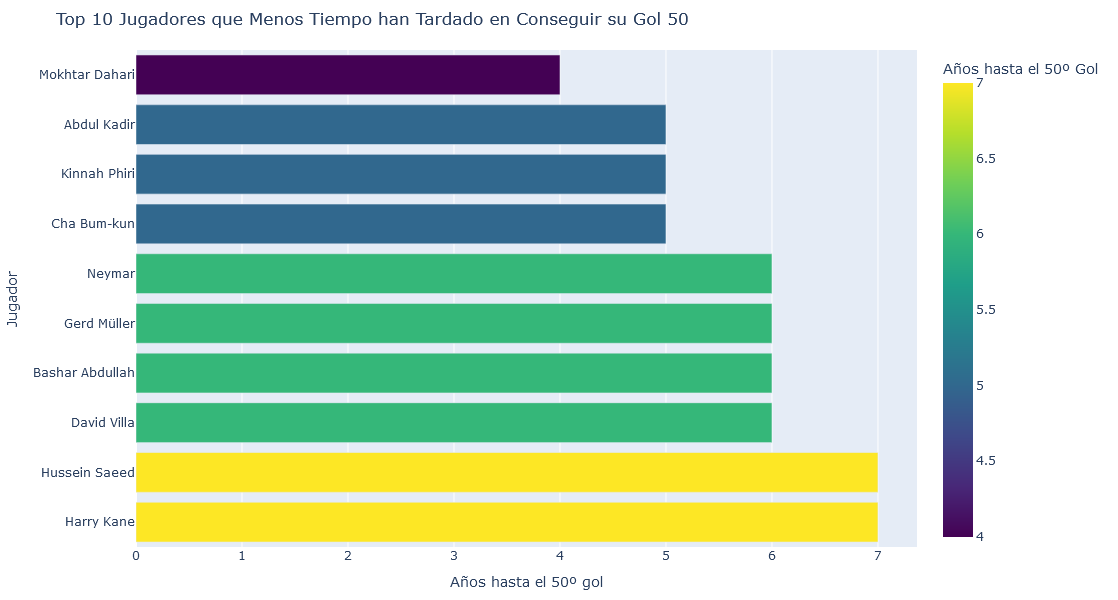

In [181]:
# Creamos el gráfico de barras interactivo
fig2 = px.bar(top_10_fastest_players,
              x = "Años hasta el gol 50",
              y = "Player",
              orientation = "h",
              title = "Top 10 Jugadores que Menos Tiempo han Tardado en Conseguir su Gol 50",
              labels = {"Años hasta el gol 50" : "Años hasta el 50º Gol", "Player" : "Jugadores"},
              hover_data = ["Goals", "Career span", "Date of 50th goal"],
              color = 'Años hasta el gol 50',
              color_continuous_scale = 'Viridis'
)

# Ajustamos el diseño para que el jugador más "rápido" esté arriba
fig2.update_layout(
    xaxis_title = "Años hasta el 50º gol",
    yaxis_title = "Jugador",
    showlegend = False,
    margin = dict(t=50, l=25, r=25, b=25),
    height = 600,
    width = 800,
    yaxis = {'categoryorder' : 'total descending'}
)

# Mostramos el gráfico
fig2.show()

Como conclusión, se puede ver que el jugador que menos tiempo ha tardado en alcanzar su gol número 50 internacionalmente es Mokhtar Dahari, el cuál tan solo tardó 4 años en lograrlo, lo que evidencia un rendimiento alto desde el inicio de su carrera internacional. 

La diferencia (dentro del Top 10) entre el jugador que menos tiempo tardó (4 años) y el que más (7 años) es de 3 años, por lo que es relativamente pequeña. Esto refleja que, internacionalmente hablando, llegar a los 50 goles en menos de 7 años es algo muy poco común y que está reservado a jugadores de élite.

En definitiva, en comparación con la mayoría de los jugadores internacioneles, este Top 10 representa a unos jugadores sobresalientes que han marcado una huella en las historias de sus seleccionas por marcar su gol número 50 en tan poco tiempo.